In [1]:
import numpy as np
import pandas as pd
import os
import json
from PIL import Image
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
import random
import cv2
# from pycocotools.coco import COCO
import time

import warnings
warnings.filterwarnings('ignore')

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
# import albumentations as A
# from albumentations.pytorch import ToTensorV2

import torchvision.models as models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN

from torchvision.models import mobilenet_v3_large
import torch.nn as nn
from torch.nn import functional as F

In [3]:
device_id = -1
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'

device

'cpu'

In [175]:
"""torch.save({'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'accuracy_train': train_epoch_accuracy,
                    'f1_micro_trainl': train_epoch_f1_micro,
                    'f1_macro_train': train_epoch_f1_macro,
                    'f1_weighted_train': train_epoch_f1_weighted,
                    'loss_train': train_loss,
                    'acc_train': train_acc,
                    'accuracy_val': valid_epoch_accuracy,
                    'f1_micro_val': valid_epoch_f1_micro,
                    'f1_macro_val': valid_epoch_f1_macro,
                    'f1_weighted_val': valid_epoch_f1_weighted,
                    'loss_val': valid_loss,
                    'acc_val': valid_acc
                    }, f'./chkpt_model1cc_clf_{epoch}.pth')"""

In [176]:
''' torch.save({'epoch': epoch,
                    'model_state_dict': model1.state_dict(),
                    'optimizer_state_dict': optimizer1.state_dict(),
                    'loss_train': loss1_train,
                    'loss_val': loss1_val,
                    }, f'./chkpt_model1_d_{epoch}.pth') '''

### Fasterrcnn_resnet50_fpn_v2 + Аугментация данных (12 обучение модели clf detect)

In [54]:
checkpoint0 = torch.load('./chkpt_model2_d_6.pth', map_location=device)

In [127]:
checkpoint0['loss_train']

[2.5437803358219196e-05,
 1.1365168183101198e-05,
 1.416265144765388e-05,
 1.1717722174732673e-05,
 1.5551705399584194e-05,
 1.312860383832501e-05,
 1.0519574049193855e-05]

In [128]:
checkpoint0['loss_val']

[0.00012517100076876088,
 0.00011889328937492294,
 7.944515269839453e-05,
 0.00010272343913634458,
 8.037801316840377e-05,
 8.93492363617272e-05,
 6.137927154261985e-05]

In [55]:
checkpoint01 = torch.load('./chkpt_model2_d_9.pth', map_location=device)

In [129]:
checkpoint01['loss_train']

[1.386198331580427e-05, 1.6805703996049538e-05, 1.484077531780421e-05]

In [130]:
checkpoint01['loss_val']

[6.434204194970981e-05, 6.860836534079664e-05, 7.421035088135866e-05]

In [57]:
c = checkpoint0['loss_train'] + checkpoint01['loss_train']

In [58]:
b = checkpoint0['loss_val'] + checkpoint01['loss_val']

Text(0.5, 1.0, 'Fasterrcnn_resnet50_fpn_v2')

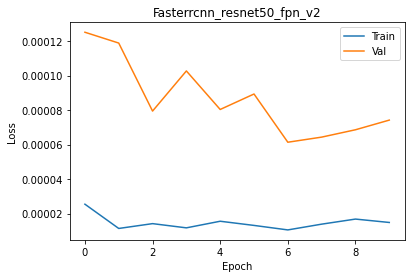

In [59]:
# тренировка на большом датасете
t = 'Fasterrcnn_resnet50_fpn_v2'
fig, ax  = plt.subplots()
ax.plot(c, label='Train')
ax.plot(b, label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

### mobilenet_v2 backbone (5Detect_m1_example)

In [81]:
checkpoint41 = torch.load('C:\\Users\\150ho\\Desktop\\DS\\project\\znaki\\detect9\\chkpt_model1_d_9.pth', map_location=device)

In [96]:
checkpoint41['loss_train']

[3.254830276187208e-06, 6.863211228998001e-06, 5.004828504945749e-06]

In [97]:
checkpoint42 = torch.load('C:\\Users\\150ho\\Desktop\\DS\\project\\znaki\\detect9\\chkpt_model1_d_6.pth', map_location=device)

In [98]:
checkpoint42['loss_train']

[5.3979584313970335e-06]

In [99]:
checkpoint43 = torch.load('C:\\Users\\150ho\\Desktop\\DS\\project\\znaki\\detect9\\chkpt_model1_d_5.pth', map_location=device)

In [100]:
checkpoint43['loss_train']

[4.814329617971333e-06, 3.795274600370118e-06]

In [101]:
checkpoint44 = torch.load('C:\\Users\\150ho\\Desktop\\DS\\project\\znaki\\detect9\\chkpt_model1_d_3.pth', map_location=device)

In [102]:
checkpoint44['loss_train']

[2.7347735623320603e-06]

In [122]:
checkpoint45 = torch.load('C:\\Users\\150ho\\Desktop\\DS\\project\\znaki\\detect9\\chkpt_model1_d_9.pth', map_location=device)

In [123]:
checkpoint45['loss_train']

[3.254830276187208e-06, 6.863211228998001e-06, 5.004828504945749e-06]

In [124]:
loss_train = [3.0580113909041236e-06, 3.219942086822831e-06, 4.540103697037512e-06, 2.7347735623320603e-06, 4.814329617971333e-06,
             3.795274600370118e-06, 5.3979584313970335e-06, 3.254830276187208e-06, 6.863211228998001e-06, 5.004828504945749e-06 ]

In [125]:
loss_val = [2.9550460077678927e-05, 2.5064738180774908e-05, 2.250354513167762e-05, 1.3922366913622962e-05, 1.565586605395835e-05, 
            1.547673869376572e-05, 2.1921661055575198e-05, 1.664455227840405e-05, 1.4956581603305844e-05, 1.3431432307697833e-05 ]

Text(0.5, 1.0, 'mobilenet_v2')

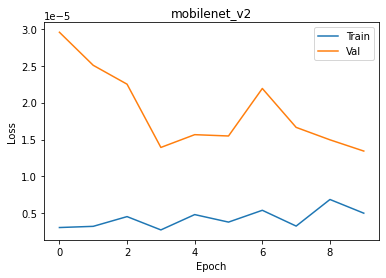

In [126]:
# тренировка на большом датасете
t = 'mobilenet_v2'
fig, ax  = plt.subplots()
ax.plot(loss_train, label='Train')
ax.plot(loss_val, label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

### Fasterrcnn_resnet50_fpn + Аугментация данных (12 обучение модели clf detect)

In [9]:
checkpoint3 = torch.load('./chkpt_model1_d_7.pth', map_location=device)

Text(0.5, 1.0, 'Fasterrcnn_resnet50_fpn')

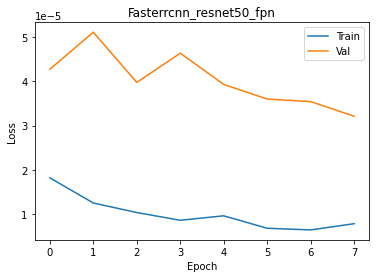

In [10]:
# тренировка на большом датасете
t = 'Fasterrcnn_resnet50_fpn'
fig, ax  = plt.subplots()
ax.plot(checkpoint3['loss_train'], label='Train')
ax.plot(checkpoint3['loss_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

In [132]:
checkpoint33 = torch.load('./chkpt_model1aa_d_9.pth', map_location=device)

In [134]:
checkpoint33['loss_train']

[3.775506413949027e-05,
 2.3507279114725846e-05,
 4.09897439524281e-05,
 2.4869881236115264e-05,
 3.457242148112212e-05,
 3.9421793541741894e-05,
 2.7149338024182362e-05,
 2.2575985423660772e-05,
 3.1180158518811795e-05]

In [135]:
checkpoint33['loss_val']

[0.00036238005500518247,
 0.00021875425725279447,
 0.00021748186531430017,
 0.0002190420228637053,
 0.00021798038231824826,
 0.00021838823814908107,
 0.00021920659260186022,
 0.00021690976822782374,
 0.00021965085026735294]

In [178]:
checkpoint333 = torch.load('./chkpt_model1aa_d_0.pth', map_location=device)

In [182]:
cc = checkpoint333['loss_train'] + checkpoint33['loss_train']

In [183]:
bb = checkpoint333['loss_val'] + checkpoint33['loss_val']

Text(0.5, 1.0, 'Fasterrcnn_resnet50_fpn')

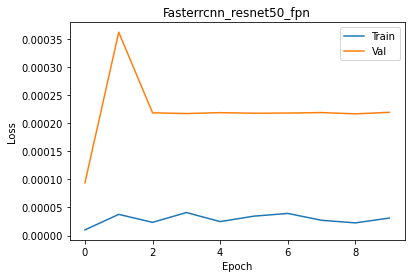

In [184]:
# тренировка на большом датасете
t = 'Fasterrcnn_resnet50_fpn'
fig, ax  = plt.subplots()
ax.plot(cc, label='Train')
ax.plot(bb, label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

### Mobilenet_v3_large на большой выборке train_anno + Аугментация данных + class не знак (12 обучение модели clf detect)

In [136]:
checkpoint22 = torch.load('chkpt_modelv3a_clf_9.pth', map_location=device)

In [137]:
checkpoint22['loss_train']

[1.0330450365638433,
 0.6446597889175195,
 0.5573109792699844,
 0.5154691516633799,
 0.4775207325863063,
 0.45078359758491154,
 0.440479735137283,
 0.4120875385835188,
 0.40924487590539615,
 0.39046261723056547]

In [138]:
checkpoint22['loss_val']

[0.6932352997105697,
 0.45386368875530947,
 0.3902326710950369,
 0.3784801074485669,
 0.3421561473059928,
 0.32608014293785753,
 0.3050029598947229,
 0.30243161911594457,
 0.3110655438283394,
 0.2978913427769453]

Text(0.5, 1.0, 'Mobilenet_v3_large')

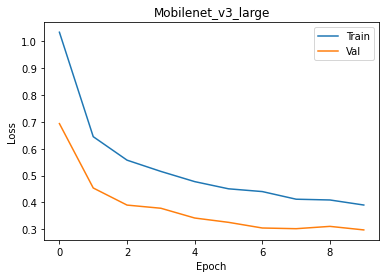

In [139]:
# тренировка на большом датасете
t = 'Mobilenet_v3_large'
fig, ax  = plt.subplots()
ax.plot(checkpoint22['loss_train'], label='Train')
ax.plot(checkpoint22['loss_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

Text(0.5, 1.0, 'Mobilenet_v3_large')

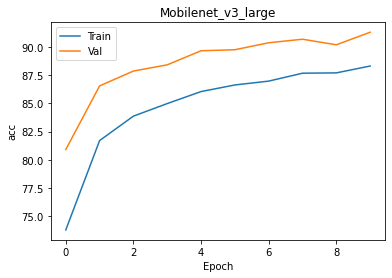

In [141]:
# тренировка на большом датасете
t = 'Mobilenet_v3_large'
fig, ax  = plt.subplots()
ax.plot(checkpoint22['acc_train'], label='Train')
ax.plot(checkpoint22['acc_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='acc')
ax.legend()
plt.title('{}'.format(t))

### Mobilenet_v3_large на маленькой выборке train_anno_reduced увеличенной в 20 раз + Аугментация данных + class не знак (12 обучение модели clf detect)

In [156]:
checkpoint211 = torch.load('./chkpt_modelrv3_clf_32.pth', map_location=device)

In [159]:
checkpoint212 = torch.load('./chkpt_modelrv3_clf_41.pth', map_location=device)

In [160]:
checkpoint213 = torch.load('./chkpt_modelrv3_clf_29.pth', map_location=device)

In [162]:
checkpoint214 = torch.load('./chkpt_modelrv3_clf_21.pth', map_location=device)

In [164]:
checkpoint215 = torch.load('./chkpt_modelrv3_clf_18.pth', map_location=device)

In [172]:
cc = checkpoint215['loss_train'] +checkpoint214['loss_train'] +checkpoint213['loss_train'] +checkpoint211['loss_train'] + checkpoint212['loss_train']

In [173]:
aa = checkpoint215['loss_val'] + checkpoint214['loss_val'] + checkpoint213['loss_val'] + checkpoint211['loss_val'] + checkpoint212['loss_val']

Text(0.5, 1.0, 'Mobilenet_v3_large')

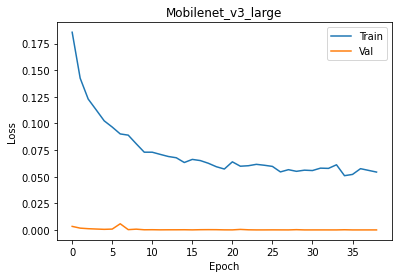

In [174]:
# тренировка на большом датасете
t = 'Mobilenet_v3_large'
fig, ax  = plt.subplots()
ax.plot(cc, label='Train')
ax.plot(aa, label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

### CustomResNet + class не знак (6CLF_m1_example)

In [14]:
checkpoint1 = torch.load('./chkpt_model1c_clf_8.pth', map_location=device)

In [15]:
f1_micro_val = []
f1_micro_train = []
f1_macro_val = []
f1_macro_train = []
f1_weighted_val = []
f1_weighted_train =[]
accuracy_val = []
accuracy_train = []

for i in range(9):
    a = torch.load(f'./chkpt_model1c_clf_{i}.pth', map_location=device)
    d = a['f1_micro_val']
    b = a['f1_micro_trainl']
    c = a['f1_macro_val']
    e = a['f1_macro_train']
    f = a['f1_weighted_val']
    g = a['f1_weighted_train']
    x = a['accuracy_val']
    y = a['accuracy_train']
    f1_micro_val.append(d)
    f1_micro_train.append(b)
    f1_macro_val.append(c)
    f1_macro_train.append(e)
    f1_weighted_val.append(f)
    f1_weighted_train.append(g)
    accuracy_val.append(x)
    accuracy_train.append(y) 

Text(0.5, 1.0, 'CustomResNet')

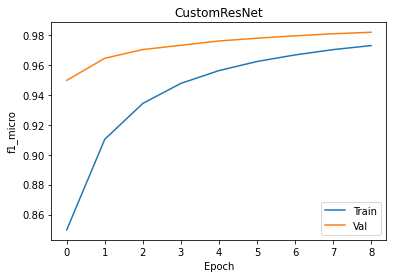

In [16]:
# тренировка на большом датасете
t = 'CustomResNet'
fig, ax  = plt.subplots()
ax.plot(f1_micro_train, label='Train')
ax.plot(f1_micro_val, label='Val')
ax.set(xlabel='Epoch', ylabel='f1_micro')
ax.legend()
plt.title('{}'.format(t))

Text(0.5, 1.0, 'CustomResNet')

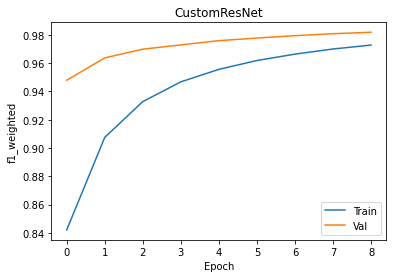

In [17]:
# тренировка на большом датасете
t = 'CustomResNet'
fig, ax  = plt.subplots()
ax.plot(f1_weighted_train, label='Train')
ax.plot(f1_weighted_val, label='Val')
ax.set(xlabel='Epoch', ylabel='f1_weighted')
ax.legend()
plt.title('{}'.format(t))

Text(0.5, 1.0, 'CustomResNet')

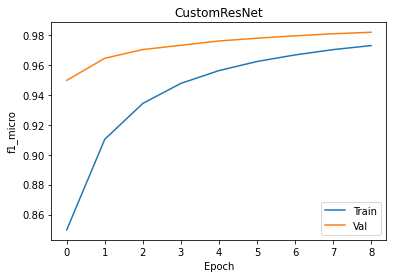

In [18]:
# тренировка на большом датасете
t = 'CustomResNet'
fig, ax  = plt.subplots()
ax.plot(f1_micro_train, label='Train')
ax.plot(f1_micro_val, label='Val')
ax.set(xlabel='Epoch', ylabel='f1_micro')
ax.legend()
plt.title('{}'.format(t))

Text(0.5, 1.0, 'CustomResNet')

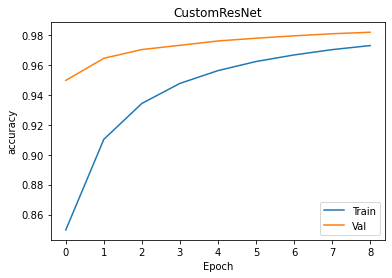

In [19]:
# тренировка на большом датасете
t = 'CustomResNet'
fig, ax  = plt.subplots()
ax.plot(accuracy_train, label='Train')
ax.plot(accuracy_val, label='Val')
ax.set(xlabel='Epoch', ylabel='accuracy')
ax.legend()
plt.title('{}'.format(t))

Text(0.5, 1.0, 'CustomResNet')

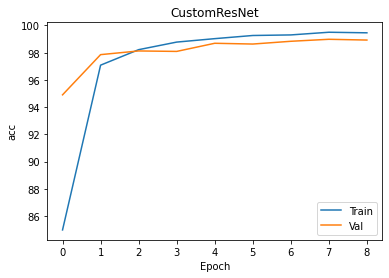

In [20]:
# тренировка на большом датасете
t = 'CustomResNet'
fig, ax  = plt.subplots()
ax.plot(checkpoint1['acc_train'], label='Train')
ax.plot(checkpoint1['acc_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='acc')
ax.legend()
plt.title('{}'.format(t))

Text(0.5, 1.0, 'CustomResNet')

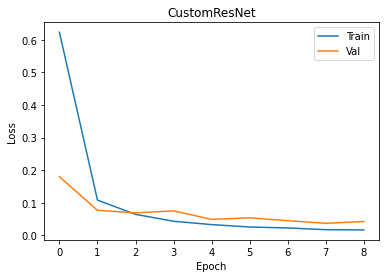

In [21]:
# тренировка на большом датасете
t = 'CustomResNet'
fig, ax  = plt.subplots()
ax.plot(checkpoint1['loss_train'], label='Train')
ax.plot(checkpoint1['loss_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

### CustomResNet + class не знак (6CLF_m1_example) на маленькой выборке train_anno_reduced увеличенной в 41 раз 

In [4]:
checkpoint17 = torch.load('./chkpt_model2c_clf_9.pth', map_location=device)

Text(0.5, 1.0, 'CustomResNet')

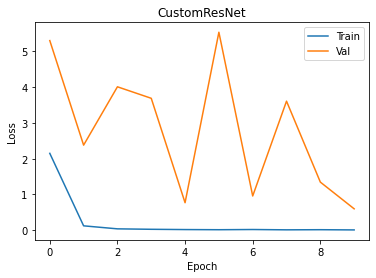

In [5]:
# тренировка на большом датасете
t = 'CustomResNet'
fig, ax  = plt.subplots()
ax.plot(checkpoint17['loss_train'], label='Train')
ax.plot(checkpoint17['loss_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

Text(0.5, 1.0, 'CustomResNet')

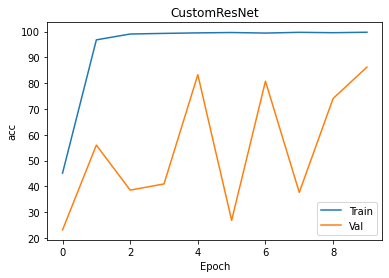

In [6]:
# тренировка на большом датасете
t = 'CustomResNet'
fig, ax  = plt.subplots()
ax.plot(checkpoint17['acc_train'], label='Train')
ax.plot(checkpoint17['acc_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='acc')
ax.legend()
plt.title('{}'.format(t))